In [3]:
import numpy as np 

import os

import cv2
from PIL import Image
from skimage import io
import scipy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from keras.utils import np_utils

Using TensorFlow backend.


In [4]:

opencv_haar_path = "/home/hantz_angrand72/master620/opencv/data/haarcascades/haarcascade_frontalface_default.xml"





def create_data_set(x_crop= 150, y_crop=150, train_size=.8): 

    """ Load the Yale Faces data set, extract the faces on the images and generate labels for each image.

        

        Returns: Train and validation samples with their labels. The training samples are flattened arrays 

        of size 22500 (150 * 150) , the labels are one-hot-encoded values for each category

    """

    images_path = [ os.path.join("yalefaces", item)  for item in  os.listdir("yalefaces") ]

    image_data = []

    image_labels = []

    

    for i,im_path in enumerate(images_path):

        im = io.imread(im_path,0)

#        if( i== 10) or (i==40) or (i==50):

#            io.imshow(im)

#            io.show()

        image_data.append(np.array(im, dtype='uint8'))

        

        

        

        label = int(os.path.split(im_path)[1].split(".")[0].replace("subject", ""))  -1

       

            

        image_labels.append(label)

    faceDetectClassifier = cv2.CascadeClassifier(opencv_haar_path)

    

    cropped_faces = []

    for im in image_data:

        facePoints = faceDetectClassifier.detectMultiScale(im)

        x,y = facePoints[0][:2]

        cropped = im[y: y + y_crop, x: x + x_crop]

        cropped_faces.append(cropped/255)

        

    X_ = np.array(cropped_faces).astype('float32')

    enc = LabelEncoder()

    y_ = enc.fit_transform(np.array(image_labels))

    y_ = np_utils.to_categorical(y_)

   
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, train_size=train_size, random_state = 22)
    #return X_train, X_test, y_train, y_test
    return (X_train).reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2])), (X_test).reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2])), (y_train).reshape((y_train.shape[0]*y_train.shape[1]),1), (y_test).reshape((y_test.shape[0]*y_test.shape[1]),1)

In [5]:

X_train, X_test, y_train, y_test  = create_data_set()

In [6]:
print(np.shape(X_train), np.size(X_train))

(132, 22500) 2970000


In [7]:
print(np.shape(y_train), np.size(y_train))

(1980, 1) 1980


In [8]:
print(np.shape(y_test), np.size(y_test))

(510, 1) 510


In [9]:
print(np.shape(X_test), np.size(y_test))

(34, 22500) 510


In [10]:
def compute_classes_mean_matrix(train_data,train_labels):

    means = np.zeros((132,22500)) 

    train_test_split_ratio = 5

    

    for i in range(1,133):

        temp =np.where(train_labels == i)[0]

        temp_sum = np.zeros((1,22500)) 

        for j in range (train_test_split_ratio):
            temp_sum += train_data[temp[j],:]
            means[i-1,:] = temp_sum / train_test_split_ratio

            return means

In [86]:
mns = compute_classes_mean_matrix(X_tr, y_tr)

In [11]:
#the overall mean for all the 167 classes

#10304*1

def compute_overall_mean_matrix(classes_means):

    temp_sum = np.zeros((1,22500)) 

    for i in range(0,132):

        temp_sum +=classes_means[i,:]

    overall_mean = temp_sum / 132

    

    return overall_mean.T

In [62]:
com = compute_overall_mean_matrix(mns)

In [63]:
com


array([[0.00151515],
       [0.00151515],
       [0.00151515],
       ...,
       [0.0013369 ],
       [0.00139037],
       [0.00134878]])

In [12]:
def compute_between_class_scatter_matrix(classes_means,overall_mean):

    n=5

    #10304*10304

    Sb = np.zeros((classes_means.shape[1],classes_means.shape[1]))

    for i in range(classes_means.shape[0]):

        Sb = np.add(Sb,n* ((classes_means[i] - overall_mean) * (classes_means[i] - overall_mean).T))

    return Sb

In [13]:
def compute_center_class_matrix(train_data,train_labels,classes_means):

    Z = np.zeros(train_data.shape)

    

    for i in range(train_data.shape[0]):

        Z[i,:] = train_data[i,:] - classes_means[int(train_labels[i])-1,:]



    return Z

In [67]:
ccm = compute_center_class_matrix(X_tr, y_tr, mns)

In [14]:
def compute_class_scatter_matrix(Z):

    S = np.zeros((22500,22500))

    S = np.dot(Z.T,Z)

    return S 

In [70]:
csm = compute_class_scatter_matrix(ccm)

In [15]:
def data_dimencionality_reduction(train_data,test_data):

    train_data_dimensionally_reductuted = np.zeros((1980,132)) 

    test_data_dimensionally_reductuted = np.zeros((1980,132)) 

    

    i=0

    for img in train_data:

        train_data_dimensionally_reductuted[i,:]=np.dot(img,eigen_vectors)

        i+=1

    i=0

    for img in test_data:

        test_data_dimensionally_reductuted[i,:] = np.dot(img,eigen_vectors)

        i+=1

        

    return train_data_dimensionally_reductuted,test_data_dimensionally_reductuted

In [16]:
def plot_accuracy_graph(accuracy):

    plt.figure(figsize=(12, 6))

    plt.plot(range(1, 25), accuracy, color='red', linestyle='dashed', marker='o',

         markerfacecolor='blue', markersize=10)

    plt.ylim(50, 100)

    plt.title('Accuracy for each K Value')

    plt.xlabel('K Value')

    plt.ylabel('Accuracy %')


Done Train Test Split
-----------------------------------------------------------
Done Train Test Split
-----------------------------------------------------------
Resize train and test set
Done reshape
-----------------------------------------------------------
Done classes means computing
-----------------------------------------------------------
Done overall mean computing
-----------------------------------------------------------
Done between class scater matrix computing
-----------------------------------------------------------
Done center class scatter matrix computing
-----------------------------------------------------------
Done within class scatter matrix computing
-----------------------------------------------------------
Done W = S^(-1)B  computing
-----------------------------------------------------------
Done eigen values and vectors computing


/home/hantz_angrand72/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/hantz_angrand72/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/hantz_angrand72/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/hantz_angrand72/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/home/hantz_angrand72/mi

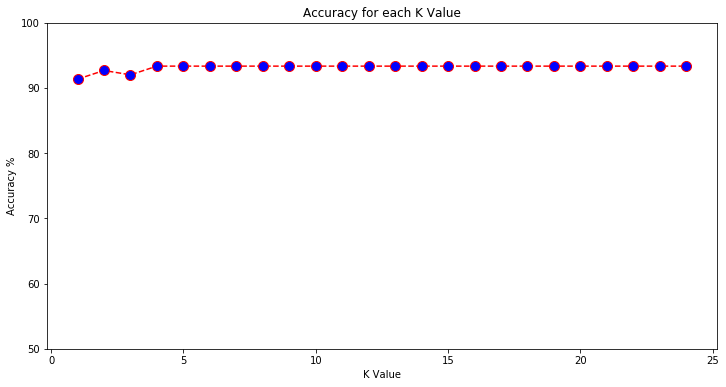

In [17]:
if  __name__ == '__main__':

    

    #data,labels = read_image()

    #print('Done images reading')

    #print('-----------------------------------------------------------')

    

    #train_data,train_labels,test_data,test_labels = train_test_split(data,labels)

    

    print('Done Train Test Split')

    print('-----------------------------------------------------------')
    
   # X_train, X_test, y_train, y_test  = create_data_set()
    
    print('Done Train Test Split')
    print('-----------------------------------------------------------')

    print("Resize train and test set")
    
    #X_tr=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
    
    #y_tr=y_train.reshape(y_train.shape[0]*y_train.shape[1],1)
    
    #X_tst=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
    
    #y_tst=y_test.reshape(y_test.shape[0]*y_test.shape[1],1)
    
    #print(np.shape(X_tst), np.size(X_tst))
    
    
    print('Done reshape')
    print('-----------------------------------------------------------')

    #classes_means = compute_classes_mean_matrix(X_train,y_train)
          
    print('Done classes means computing')

    print('-----------------------------------------------------------')

    

    #overall_mean = compute_overall_mean_matrix(classes_means)

    print('Done overall mean computing')

    print('-----------------------------------------------------------')

    

    #S_between = compute_between_class_scatter_matrix(classes_means,overall_mean)

    print('Done between class scater matrix computing')

    print('-----------------------------------------------------------')

    

    #Z = compute_center_class_matrix(X_train,y_train,classes_means)

    print('Done center class scatter matrix computing')

    print('-----------------------------------------------------------')

    

    #S_classes = compute_class_scatter_matrix(Z)

    print('Done within class scatter matrix computing')

    print('-----------------------------------------------------------')

    

    #W_value = np.dot(np.linalg.inv(S_classes),S_between)

    print('Done W = S^(-1)B  computing')

    print('-----------------------------------------------------------')

    

    #132 largest eigen values

    #eigen_values,eigen_vectors = scipy.linalg.eigh(W_value,eigvals=((22500-132),(22500-1)))

    print('Done eigen values and vectors computing')
    #eigv=eigen_vectors.reshape(132, 22500)

    #print(np.shape(eigen_values),np.shape(eigv))

    

    #reduce dimensionality of both train and test data sets

    #train_data_dimensionally_reductuted,test_data_dimensionally_reductuted = data_dimencionality_reduction(X_train,X_test)

    



    accuracy = []

    #Apply KNN

    for i in range(1, 25):

        classifier = KNeighborsClassifier(n_neighbors=i)

        classifier.fit(train_data_dimensionally_reductuted, y_train)

    

        test_predict = classifier.predict(test_data_dimensionally_reductuted)

        

        true_predicted_count=0

        for j in range(0,150):

            if test_predict[j] ==y_test[j]:

                true_predicted_count+=1

        accuracy.append((true_predicted_count/150)*100)

    

    #plot graph for different K values

    plot_accuracy_graph(accuracy) 


In [18]:
def acc_avg():
    acc=0
    for i in accuracy:
        acc = acc + i
    avg_acc = acc/len(accuracy)
    return avg_acc

In [19]:
print("Average accurayc rate", acc_avg())

Average accurayc rate 93.16666666666667
